In [1]:
import numpy as np

# Wipe all outputs from this notebook
from IPython.display import Image, clear_output, display
clear_output(True)

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline


# Determining Big-O for an algorithm

+ It's almost always some combination of a polynomial $N^{\alpha}$ and $Log(N)$. Remember that overwriting values, peeking the front of a queue, etc take constant time or $\mathcal{O}(1)$


### Some useful times to know
+ $Log(N)$ usually means you can do something clever (recursion, bisection search, etc)
+ Exp(N) is rare and usually not optimal (describes a process that branches)
+ Stirling's approximation: $N! \sim \sqrt{N} e^{-N} N^N$ or $Log(N!) \sim N Log N$
+ Sorting a list via mergesort is $\mathcal{O}(N Log(N))$ 
+ Binary search, two-sum are pointers with LogN time
+ Dot product of two length-$N$ vectors is $\mathcal{O}(N)$. $N \times N$ matrix-vector product is $\mathcal{O}(N^2)$. Product of two $N \times N$ matrices is $\mathcal{O}(N^3)$

### Binary search

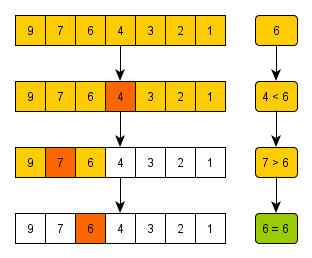

In [3]:
Image("../resources/binsearch.png", width=500)
# Source: https://stackoverflow.com/questions/38684111/worst-case-time-complexity-to-search-an-element-in-a-closely-sorted-array-of-ele

In [2]:
def binary_search(a, target):
    """
    Find the index of the first element in a *sorted* array that is greater than or equal to target.

    We are using a two-pointer approach with binary search
    """
    lo = 0
    hi = len(a)
    while lo < hi:
        mid = (lo + hi) // 2
        if a[mid] < target:
            lo = mid + 1
        else:
            hi = mid
    return lo

a = np.array([1, 2, 3, 4, 7, 8, 9, 10, 15, 43, 99])

print(binary_search(a, 5))

4


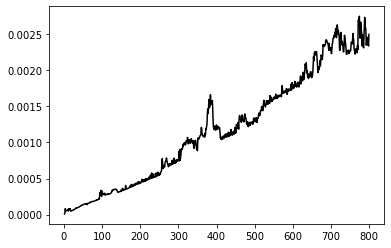

In [69]:
nvals = np.arange(2, 800)
all_times = list()
for n in nvals:
    all_reps = list()
    for rep in range(10):
        all_reps.append(
            timeit.timeit("binary_search(np.arange(n), n // 2)", globals=globals(), number=n)
        )
    all_times.append(np.mean(all_reps))

plt.figure()
plt.plot(nvals, all_times, 'k')

# Recursion and dynamic programming

+ Look for problems where the solution to the size $N$ input can be written in terms of the size $N - 1$, $N - 2$, etc inputs

+ + Factorial: $N! = N (N - 1)!$
+ + Fibonacci: $Fib(N) = Fib(N - 1) + Fib(N - 2)$
+ + Ornstein-Uhlenbeck Process: $x_{t + 1} = \alpha x_t + \epsilon$

<br></br>

### Key ingredients

+ Base cases: $0! = 1$, $x_0 = 1$ (initial conditions), etc
+ Inductive reasoning: write a case for $N$ in terms of $N - 1$, $N - 2$, etc

### Recursion vs Dynamic programming
+ Dynamic programming: start from base cases, and work your way up to $N$
+ Recursion: start from $N$, then do $N - 1$, etc, until you hit a base case

+ Both use a "divide and conquer" approach, but they work in opposite directions
+ When working with graphs or trees, we often encounter recursion due to the need to perform depth-first search
+ When simulating dynamical systems, or processes that don't go backwards, we often run into DP

+ Dynamic programming is typically $\mathcal{O}(N)$ runtime, $\mathcal{O}(1)$ memory. Recursion is ideally $\mathcal{O}(Log(N))$ runtime


## Recursion

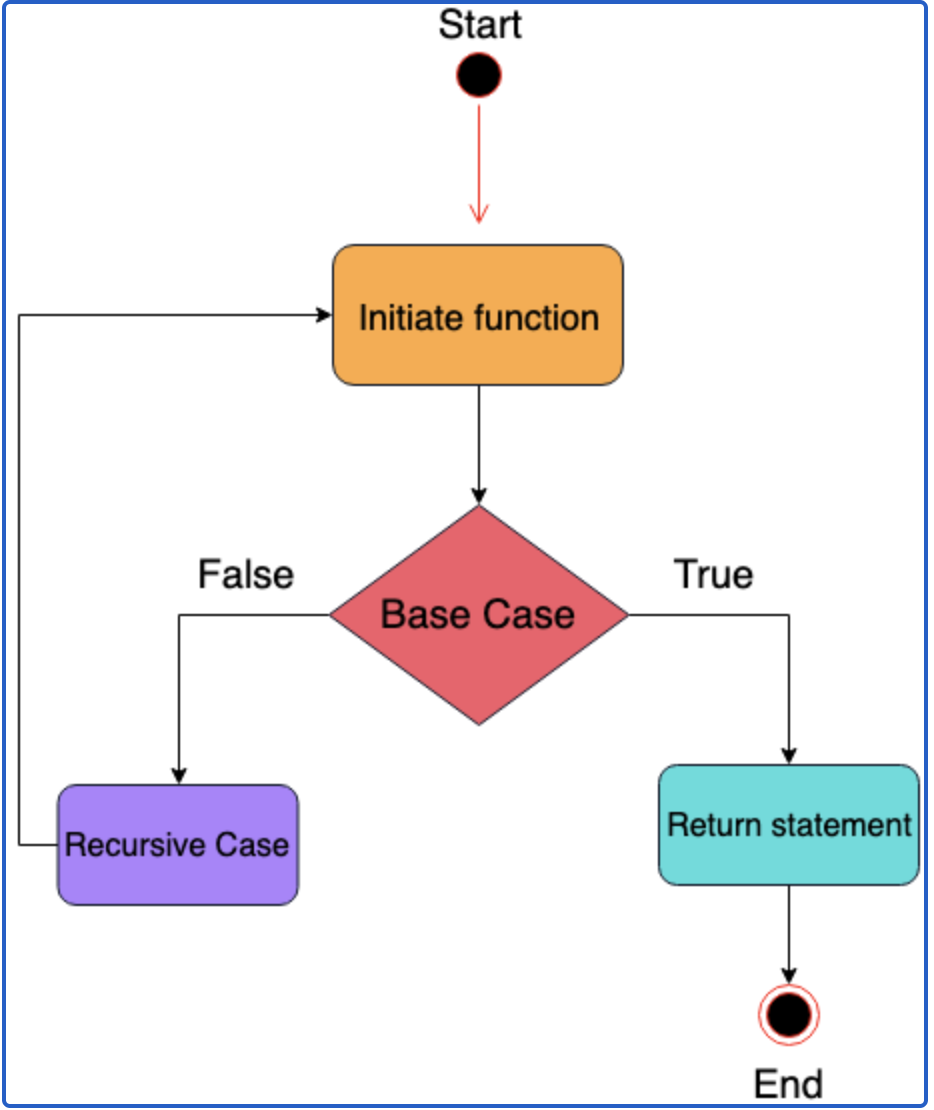

In [5]:
Image("../resources/recursion.png", width=500)
# Source: https://betterprogramming.pub/recursive-functions-2b5ce4610c81

/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_41537/4078796214.py:8: RuntimeWarning: overflow encountered in long_scalars
  return n * factorial(n - 1)


Text(0, 0.5, 'Time (s)')

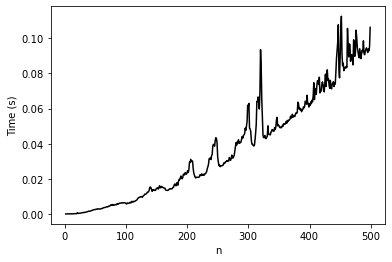

In [52]:
def factorial(n):
    """Compute n factorial via recursion"""
    # Base case
    if n == 0:
        return 1
    # Recursive case
    else:
        return n * factorial(n - 1)



### Run a timing test
import timeit

nvals = np.arange(2, 500)
all_times = list()
for n in nvals:
    all_times.append(
        timeit.timeit("factorial(n)", globals=globals(), number=n)
    )

plt.figure()
plt.plot(nvals, all_times, 'k')
# plt.plot(nvals, 2e-7 * nvals**2)
plt.xlabel("n")
plt.ylabel("Time (s)")

# Why is this not O(N)? It turns out that multiplying large floats has unfavorable 
# scaling with N (Karatsuba multiplication is O(N^1.59), gradeschool is O(N^2) where N is
# the number of digits). 


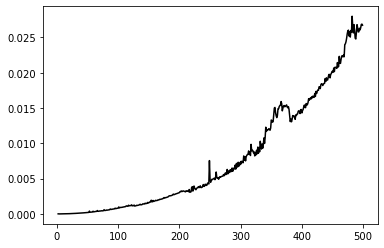

In [46]:
def factorial(n):
    """Compute n factorial, for n >= 0, with dynamic programming."""
    nprev = 1
    # Base case
    if n == 0:
        return nprev
    for i in range(1, n + 1):
        nprev *= i
    return nprev

import timeit

nvals = np.arange(2, 500)
all_times = list()
for n in nvals:
    all_times.append(
        timeit.timeit("factorial(n)", globals=globals(), number=n)
    )

plt.figure()
plt.plot(nvals, all_times, 'k')
plt.plot(nvals, 8e-8 * nvals**2)


Text(0, 0.5, 'Time (s)')

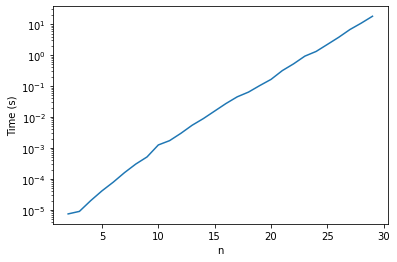

In [61]:
def fibonacci(n):
    """Compute the nth Fibonacci number via recursion"""
    # Base cases
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

nvals = np.arange(2, 30)
all_times = list()
for n in nvals:
    all_times.append(
        timeit.timeit("fibonacci(n)", globals=globals(), number=n)
    )
plt.semilogy(nvals, all_times)
plt.xlabel("n")
plt.ylabel("Time (s)")


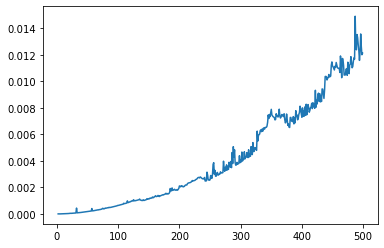

In [60]:
def fibonacci(n):
    """Compute the nth Fibonacci number via dynamic programming."""
    
    if n == 0:
        return 0
    elif n == 1:
        return 1

    n1, n2 = 0, 1
    for i in range(2, n + 1):
        n1, n2 = n2, n1 + n2
    return n2

nvals = np.arange(2, 500)
all_times = list()
for n in nvals:
    all_times.append(
        timeit.timeit("fibonacci(n)", globals=globals(), number=n)
    )
plt.plot(nvals, all_times)


# The discrete Fourier Transform

We are going to implement possibly the most important algorithm of the 20th century, the fast Fourier transform. This algorithm allows signals to be readily transformed into the frequency domain, a setting where it is easier to filter noise, detect background patterns, and identify significant motifs

A discrete approach to this algorithm involves projecting our signal onto a set of "pure" basis functions corresponding to single-frequency (monochromatic) signals. In continuous time, we would have a continuous and uncountable set of frequencies, but for a discrete signal we have a finite number of possible frequency bins.

If our observed signal is $x_n = x_1, x_2, ..., x_N$, then the discrete Fourier transform becomes
$$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N}
$$
with corresponding inverse transform
$$
x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{i~2\pi~k~n~/~N}
$$
In our naive implementation below, we compute the set of "pure" functions, and then project the signal onto this basis. This approach is easy to vectorize, since all operations that touch all $N$ elements of the signal can be written as dot products.

In matrix notation, the vectorized DFT is given by
$$
\mathbf{X} = M \cdot \mathbf{x}
$$
where
$$
M_{kn} = e^{-i~2\pi~k~n~/~N}.
$$

### A symmetry in the discrete equations

The key idea of the fast Fourier transform is based on the observation that this calculation has an even-odd symmetry. If we shift our Fourier transform calculation above in order to find $X_{N+k}$, the calculation becomes
$$
\begin{align*}
X_{N + k} &=  \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~(N + k)~n~/~N}\\
          &= \sum_{n=0}^{N-1} x_n \cdot e^{- i~2\pi~n} \cdot e^{-i~2\pi~k~n~/~N}\\
          &= \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N}
\end{align*}
$$
because $\exp[2\pi~i~n] = 1$ for all $n$. Using this property, we can derive the following symmetry
$$
X_{k + i \cdot N} = X_k
$$

### The fast Fourier transform

As a result of the symmetry above, it's possible to divide our Fourier transform calculation into two parts,
$$
\begin{align*}
X_k &= \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~(2m)~/~N} + \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~(2m + 1)~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~m~/~(N/2)} + e^{-i~2\pi~k~/~N} \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~m~/~(N/2)}
\end{align*}
$$

Since our argument does not depend on the specific value of $n$, we now have a clear way to attack this problem: given a full signal on which to compute the FFT, split the signal into two smaller signals, and then call the Fourier transform calculation on each of the two subarrays. If either subarray is larger than size 2, then divide it again. If it's equal in length to 2 or less, then compute the discrete Fourier transform, which has a simple form for signals of length one and two.

This approach is naturally suited to recursion, with the short length-1 and length-2 signal cases representing base cases for returns. This appraoch is known as divide-and-conquer.

While the vanilla DFT has runtime complexity $N^2$ due to the need to compute $N$ dot products for each of the $N$ pure frequency components, the FFT has runtime $N \log N$ because it reduces the problem in each step



*This notebook was adapted from [Jake VanderPlas's excellent tutorial](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)*


+ Notice that our base class includes a freq_bounds function. Where do these bounds come from?

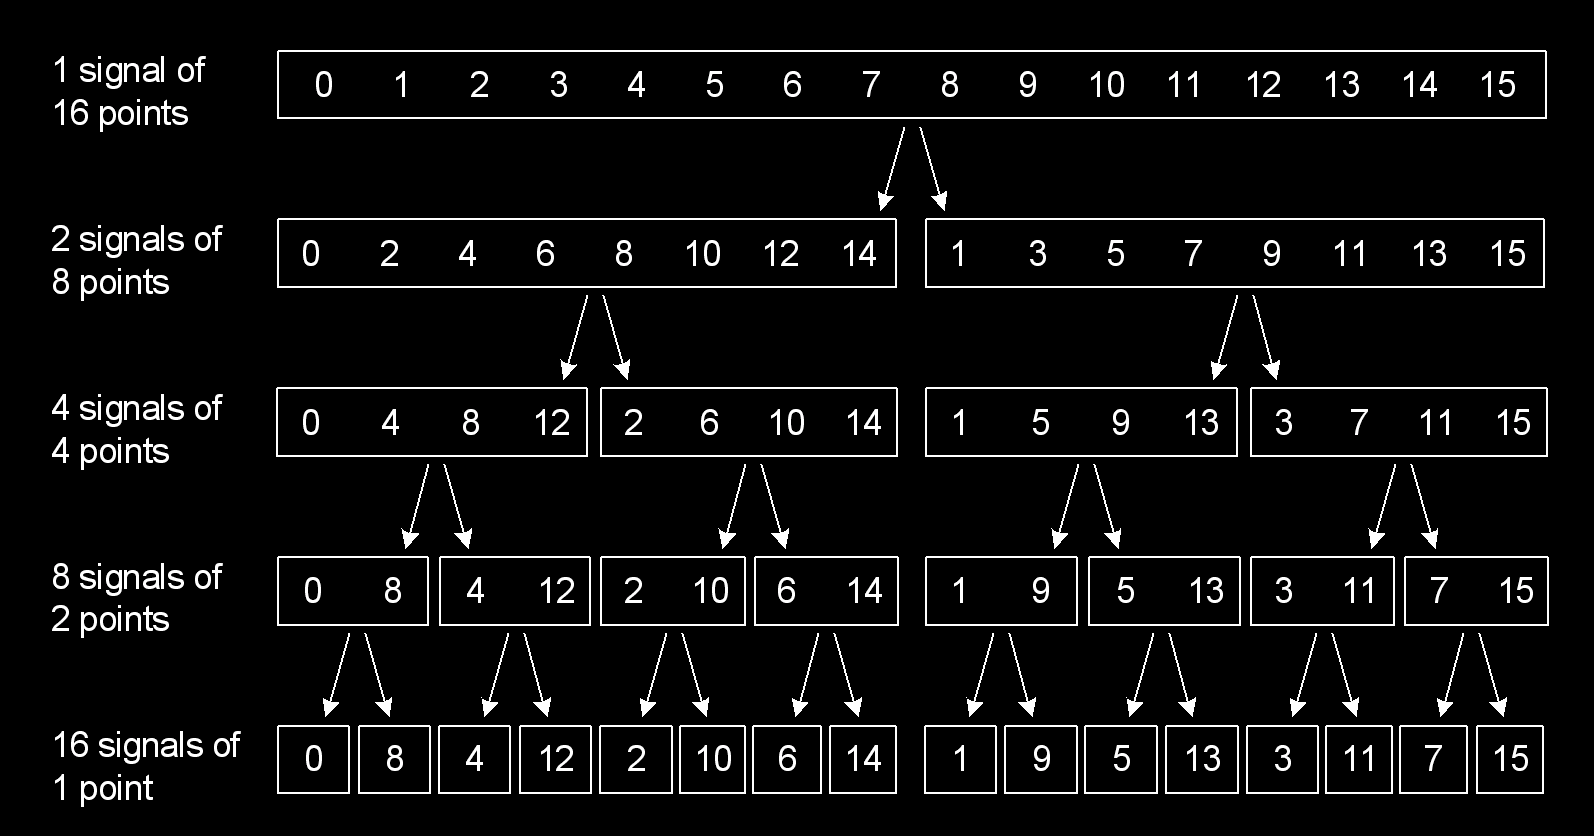

In [108]:
Image("../resources/fft.png", width=1000)
# Source: https://riptutorial.com/algorithm/example/27088/radix-2-fft

/Users/williamgilpin/miniconda3/envs/phys381/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/williamgilpin/miniconda3/envs/phys381/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/williamgilpin/miniconda3/envs/phys381/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


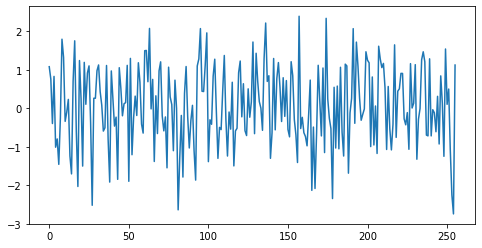

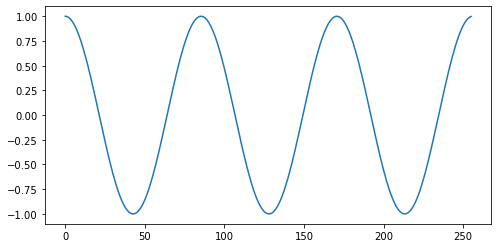

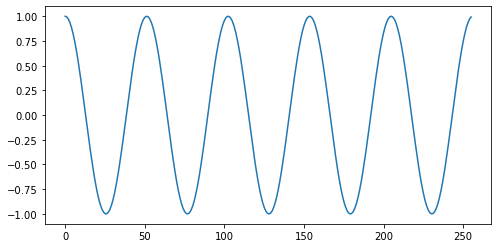

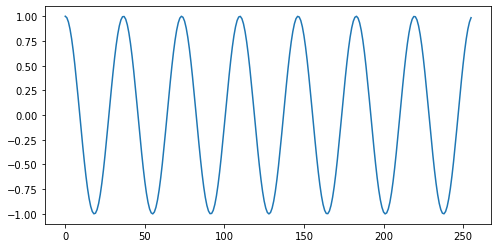

In [11]:
time_series = np.random.randn(256)

plt.figure(figsize=(8, 4))
plt.plot(time_series)

basis_functions = np.exp(-2j * np.pi * np.arange(256)[:, np.newaxis] * np.arange(256) / 256)

plt.figure(figsize=(8, 4))
plt.plot(basis_functions[3])
plt.figure(figsize=(8, 4))
plt.plot(basis_functions[5])
plt.figure(figsize=(8, 4))
plt.plot(basis_functions[7])

Text(0.5, 1.0, 'Seventh Row')

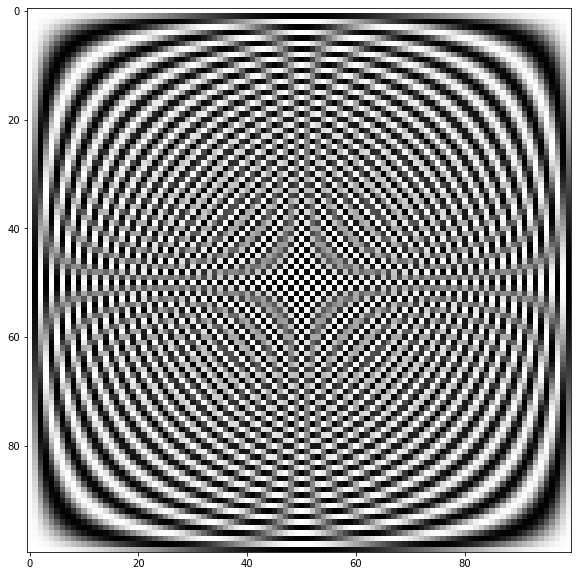

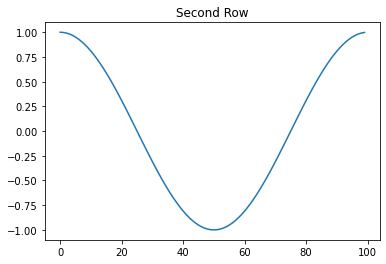

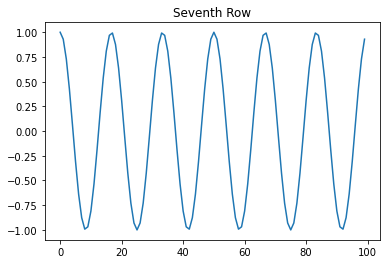

In [5]:
# Python has built-in complex numbers, which numpy supports
N = 100
coeffs = np.exp(-2j * np.pi * np.arange(N)[:, None] * np.arange(N) / N)

plt.figure(figsize=(10, 10))
plt.imshow(np.real(coeffs), cmap='gray')

plt.figure()
plt.plot(np.real(coeffs)[:, 1])
plt.title("Second Row")


plt.figure()
plt.plot(np.real(coeffs)[:, 6])
plt.title("Seventh Row")


In [80]:
class SignalTransform:
    """
    A base class for signal transformations

    Parameters:
        center (bool): whether to center the signal before transforming
    """
    
    def __init__(self, center=True):
        self.center = center
        
    def preprocess(self, signal):
        if self.center:
            signal -= np.mean(signal, axis=0, keepdims=True)
    
    # static methods don't require a "self" argument, but also can't 
    # access instance attributes. For example, this function can't see the 
    # self.center variable that we set in the __init__() constructor 
    @staticmethod
    def freq_bounds(signal):
        """Compute upper and lower frequency bounds using the Nyquist criterion"""
        n = len(signal)
        return 1 / (2 * n), n / 2

    # def plot(self, signal, ax=None, **kwargs):
    #     """Plot the signal in the time domain"""
    #     if ax is None:
    #         ax = plt.gca()
    #     ax.plot(signal, **kwargs)
    #     ax.set_xlabel('Time')
    #     ax.set_ylabel('Amplitude')
    #     ax.set_title('Time Domain')
    #     return ax

    # def plot_freq(self, signal, ax=None, **kwargs):
    #     """Plot the signal in the frequency domain"""
    #     if ax is None:
    #         ax = plt.gca()
    #     freq = np.fft.rfftfreq(len(signal))
    #     ax.plot(freq, np.abs(np.fft.rfft(signal)), **kwargs)
    #     ax.set_xlabel('Frequency')
    #     ax.set_ylabel('Amplitude')
    #     ax.set_title('Frequency Domain')
    #     return ax



class DiscreteFourierTransform(SignalTransform):
    """
    An iterative implementation of the discrete Fourier transform

    Vectorized using array broadcasting
    """
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def transform(self, signal):
        """Compute the discrete Fourier transform of a signal"""
        
        n = len(signal)
        k_vals = np.arange(n)[:, None]
        
        # Python has built-in complex numbers, which numpy supports
        coeffs = np.exp(-2j * np.pi * k_vals * np.arange(n) / n)
        
        return np.dot(coeffs, signal)
    
    
    
class FastFourierTransform(SignalTransform):
    """
    A recursive implementation of the fast Fourier transform
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def transform(self, signal):
        
        n = len(signal)
        
        if n == 1:  # base case
            return signal
        else:
            signal_even = self.transform(signal[::2])
            signal_odd = self.transform(signal[1::2])
            coeffs = np.exp(-2j * np.pi * np.arange(n) / n)
            signal_new =  np.hstack([
                signal_even + coeffs[:(n // 2)] * signal_odd,
                signal_even + coeffs[(n // 2):] * signal_odd
            ])
            return signal_new


In [3]:
x = np.random.random(2**10) # Needs to be a power of 2

dft_m = DiscreteFourierTransform()
%timeit dft_m.transform(x) 
print(np.allclose(dft_m.transform(x), np.fft.fft(x)))

fft_m = FastFourierTransform()
%timeit fft_m.transform(x) 
print(np.allclose(fft_m.transform(x), np.fft.fft(x)))

25.2 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
True
10.4 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
True


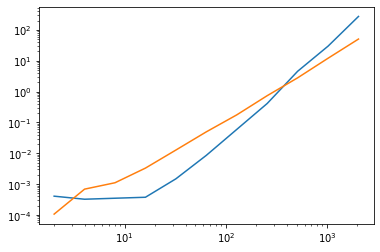

In [93]:
import timeit

n_vals = 2**np.arange(1, 12)

x = np.random.random(2**12) # Needs to be a power of 2
dft_m = DiscreteFourierTransform()
fft_m = FastFourierTransform()

all_times = []
for n in n_vals:
    time1 = timeit.timeit("dft_m.transform(x[:n])", globals=globals(), number=n)
    time2 = timeit.timeit("fft_m.transform(x[:n])", globals=globals(), number=n)
    all_times.append([time1, time2])
all_times = np.array(all_times)

plt.figure()
plt.loglog(n_vals, all_times[:, 0])
plt.loglog(n_vals, all_times[:, 1])